
# Presets

This notebook demonstrates how to use the `presets` package to change the
default parameters for librosa.


In [ ]:
# Code source: Brian McFee
# License: ISC

We'll need numpy and matplotlib for this example



In [2]:
! pip install presets

Defaulting to user installation because normal site-packages is not writeable
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Created wheel for presets: filename=presets-0.1.3-py3-none-any.whl size=3925 sha256=d091b6c36abdaf43b7b538cdfa572eae5ec5ec06a0a194f2a81f6b4a38a44681
  Stored in directory: c:\users\lenovo\appdata\local\pip\cache\wheels\60\c5\f7\7672f844e112f8d4857b73e69dd7ed2743e24fe6ce54aa2396
Successfully built presets


In [3]:
import numpy as np
import matplotlib.pyplot as plt

# Import the Preset class
from presets import Preset

# To use presets, we'll make a mock import of librosa
import librosa as _librosa

By default, librosa uses the following parameters across all functions:
  - `sr=22050` (sampling rate)
  - `hop_length=512` (number of samples between frames)
  - `n_fft=2048` (number of samples per frame in STFT-like analyses)

You may want to change these values to suit your application, but
doing so consistently in every function call can be somewhat cumbersome.

Presets makes it easy to do this all at once by wrapping the module
and all function calls, and overriding default arguments.



In [4]:
# First, we need to set up the preset-wrapped librosa import

librosa = Preset(_librosa)

# To change the default sampling rate, we can set the `sr` entry:
librosa['sr'] = 44100

# and similarly for hop_length and n_fft
librosa['hop_length'] = 1024
librosa['n_fft'] = 4096

# In general, when you set `librosa['X']` for any string `X`, anywhere within
# librosa where the parameter `X` occurs as a keyword-argument,
# its default value will be replaced by whatever value you provide.

c:\ProgramData\anaconda3\Lib\site-packages\paramiko\transport.py:219: CryptographyDeprecationWarning: Blowfish has been deprecated
  "class": algorithms.Blowfish,


Now we can load in a file and do some analysis with the new defaults



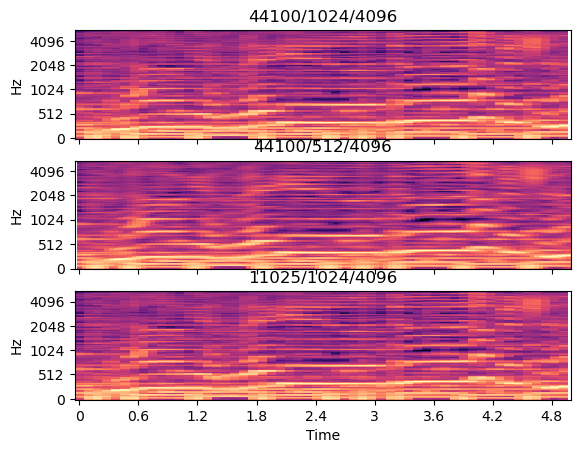

In [6]:
filename = librosa.ex('fishin')

y, sr = librosa.load(filename, duration=5, offset=35)

# Generate a Mel spectrogram:

M = librosa.feature.melspectrogram(y=y)

# Of course, you can still override the new default manually, e.g.:

M_highres = librosa.feature.melspectrogram(y=y, hop_length=512)


# And plot the results
fig, ax = plt.subplots(nrows=3, sharex=True, sharey=True)

librosa.display.specshow(librosa.power_to_db(M, ref=np.max),
                         y_axis='mel', x_axis='time', ax=ax[0])

ax[0].set(title='44100/1024/4096')
ax[0].label_outer()

librosa.display.specshow(librosa.power_to_db(M_highres, ref=np.max),
                         hop_length=512,
                         y_axis='mel', x_axis='time', ax=ax[1])
ax[1].set(title='44100/512/4096')
ax[1].label_outer()

# We can repeat the whole process with different defaults, just by
# updating the parameter entries
librosa['sr'] = 11025

y2, sr2 = librosa.load(filename, duration=5, offset=35)
M2 = librosa.feature.melspectrogram(y=y2, sr=sr2)

librosa.display.specshow(librosa.power_to_db(M2, ref=np.max),
                         y_axis='mel', x_axis='time', ax=ax[2])

ax[2].set(title='11025/1024/4096')
from IPython.display import Audio
Audio(data=y, rate=sr)
